In [ ]:
!pip3 install plotly==4.4.1
!pip3 install finrl
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
!pip3 install git+https://github.com/AI4Finance-LLC/FinRL-Library.git
!pip3 install PyPortfolioOpt

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
import datetime

from finrl import config
from finrl import config_tickers
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_portfolio_allocation.env_portfolio import StockPortfolioEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts
from finrl.finrl_meta.data_processor import DataProcessor
from finrl.finrl_meta.data_processors.processor_yahoofinance import YahooFinanceProcessor
import sys
import random
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
from scipy import stats

/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import os

if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [3]:
tickers = config_tickers.DOW_30_TICKER

len(tickers)


30

In [4]:
df = YahooDownloader(start_date = '2008-01-01',
                     end_date = '2022-06-10',
                     ticker_list = tickers).fetch_data()

[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


Shape of DataFrame:  (106233, 8)


In [5]:
df

,date,open,high,low,close,volume,tic,day
0,2007-12-31,7.125000,7.160714,7.062500,6.048641,539333200,AAPL,0
1,2007-12-31,46.840000,46.880001,46.209999,35.322113,7226000,AMGN,0
2,2007-12-31,50.849998,52.570000,50.619999,41.112213,8380600,AXP,0
3,2007-12-31,88.139999,88.279999,87.239998,64.097244,3184200,BA,0
4,2007-12-31,73.000000,73.709999,72.389999,48.465950,2639600,CAT,0
...,...,...,...,...,...,...,...,...
106228,2022-06-09,492.880005,496.459991,487.609985,489.429993,3148800,UNH,3
106229,2022-06-09,212.589996,213.710007,206.020004,206.110001,5138600,V,3
106230,2022-06-09,51.619999,51.770000,50.919998,50.939999,12078400,VZ,3
106231,2022-06-09,42.400002,42.709999,41.689999,41.720001,5207300,WBA,3


In [6]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=True,
                    user_defined_feature = False)

df = fe.preprocess_data(df)

/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated an

Successfully added technical indicators
Successfully added turbulence index


In [7]:
len(df['tic'].unique())

28

In [8]:
df_original = df.copy()
df_original.min()

date            2007-12-31
open              2.835357
high              2.928571
low               2.792857
close             2.387943
volume              201900
tic                   AAPL
day                      0
macd             -56.99468
boll_ub           2.886977
boll_lb           2.352735
rsi_30                 0.0
cci_30         -755.968088
dx_30              0.00011
close_30_sma      2.692604
close_60_sma      2.761143
turbulence             0.0
dtype: object

In [9]:
# add covariance matrix as states
df=df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
return_list = []

# look back is one year
lookback=252
for i in range(lookback,len(df.index.unique())):
  data_lookback = df.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  return_list.append(return_lookback)

  covs = return_lookback.cov().values 
  cov_list.append(covs)

  
df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list,'return_list':return_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)

In [10]:
if('turbulence' not in config.INDICATORS):
    config.INDICATORS.append('turbulence')
config.INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma',
 'turbulence']

In [11]:
df_tech = df[config.INDICATORS]
df_tech = (df_tech - df_tech.expanding().min())/(df_tech.expanding().max() - df_tech.expanding().min())
df_tech = df_tech.fillna(0.5)
df_tech

,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
2,0.000000,0.380705,0.265277,0.000000,0.000000,1.000000,0.331226,0.384736,0.500000
3,0.495866,0.685701,0.664071,0.418668,0.997043,0.000000,0.682965,0.745608,0.500000
4,1.000000,0.670701,0.588881,0.914958,1.000000,0.447721,0.611331,0.616821,0.500000
...,...,...,...,...,...,...,...,...,...
94775,0.725641,0.319185,0.329890,0.429009,0.519372,0.082194,0.327900,0.344652,0.036424
94776,0.688678,0.911770,0.939648,0.423631,0.516512,0.208268,0.945440,0.999720,0.036424
94777,0.728243,0.090036,0.090609,0.473683,0.591912,0.027008,0.089998,0.094829,0.036424
94778,0.720017,0.075710,0.076113,0.356624,0.472564,0.149651,0.077214,0.081697,0.036424


In [12]:
for col in df_tech.columns:
    df[col] = df_tech[col]

df

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence,cov_list,return_list
0,2008-12-30,3.122143,3.144643,3.025714,2.634982,967601600,AAPL,1,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,"[[0.0013494491185867881, 0.0004283421125996778...",tic AAPL AMGN AXP ...
1,2008-12-30,57.000000,57.660000,56.820000,43.802753,4300800,AMGN,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,"[[0.0013494491185867881, 0.0004283421125996778...",tic AAPL AMGN AXP ...
2,2008-12-30,17.820000,18.129999,17.700001,14.466434,11777300,AXP,1,0.000000,0.380705,0.265277,0.000000,0.000000,1.000000,0.331226,0.384736,0.500000,"[[0.0013494491185867881, 0.0004283421125996778...",tic AAPL AMGN AXP ...
3,2008-12-30,40.080002,41.340000,39.810001,30.940784,4549700,BA,1,0.495866,0.685701,0.664071,0.418668,0.997043,0.000000,0.682965,0.745608,0.500000,"[[0.0013494491185867881, 0.0004283421125996778...",tic AAPL AMGN AXP ...
4,2008-12-30,42.570000,43.750000,42.009998,29.936316,5060400,CAT,1,1.000000,0.670701,0.588881,0.914958,1.000000,0.447721,0.611331,0.616821,0.500000,"[[0.0013494491185867881, 0.0004283421125996778...",tic AAPL AMGN AXP ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94775,2022-06-09,175.899994,175.899994,171.460007,171.529999,809700,TRV,3,0.725641,0.319185,0.329890,0.429009,0.519372,0.082194,0.327900,0.344652,0.036424,"[[0.00032585315722177116, 5.219319588811816e-0...",tic AAPL AMGN AXP ...
94776,2022-06-09,492.880005,496.459991,487.609985,489.429993,3148800,UNH,3,0.688678,0.911770,0.939648,0.423631,0.516512,0.208268,0.945440,0.999720,0.036424,"[[0.00032585315722177116, 5.219319588811816e-0...",tic AAPL AMGN AXP ...
94777,2022-06-09,51.619999,51.770000,50.919998,50.939999,12078400,VZ,3,0.728243,0.090036,0.090609,0.473683,0.591912,0.027008,0.089998,0.094829,0.036424,"[[0.00032585315722177116, 5.219319588811816e-0...",tic AAPL AMGN AXP ...
94778,2022-06-09,42.400002,42.709999,41.689999,41.720001,5207300,WBA,3,0.720017,0.075710,0.076113,0.356624,0.472564,0.149651,0.077214,0.081697,0.036424,"[[0.00032585315722177116, 5.219319588811816e-0...",tic AAPL AMGN AXP ...


In [13]:
train = data_split(df, '2009-01-01','2019-07-01')

In [14]:
from scipy import stats
class StockPortfolioEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                turbulence_threshold,
                lookback=252,
                day = 0,
                training = False):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.training = training
        self.turbulence_threshold = turbulence_threshold

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,)) 
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list)+2,self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.turb_arr = np.full((1,self.state_space),self.turbulence_threshold)
        self.state = np.append(self.state,self.turb_arr,axis=0)

        self.init_weights = np.full((1,self.state_space),0)
        self.init_weights[0] = 1
        self.state = np.append(self.state,self.init_weights,axis=0)
        #self.state = np.append(self.state,self.data['turbulence'].values.tolist())
        #print(self.state)
        self.terminal = False     
                
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/(self.stock_dim+1)]*(self.stock_dim+1)]
        self.date_memory=[self.data.date.unique()[0]]

        
    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique())-1

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            self.reward = 0
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()
            
            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))           
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")
            
            return self.state, self.reward, self.terminal,{}

        else:
            weights = self.softmax_normalization(actions) 
            self.actions_memory.append(weights)
            last_day_memory = self.data

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            percentile = stats.percentileofscore(self.df['turbulence'].values,self.data['turbulence'].values[0]) #percentil de la turbolencia
            #print('Turbulence: ',self.data['turbulence'].values[0])

            idx_turbolence = int((percentile/100) >= self.turbulence_threshold) #Veure si la turbolencia és major que el limit
            cash = weights[-1]
            cash_turb_diff = abs(cash - (percentile/100))
            self.state =  np.append(np.array(self.covs)*1000, [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            self.state = np.append(self.state,self.turb_arr,axis=0)
            
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights[0:-1])
            log_portfolio_return = np.log(sum((self.data.close.values / last_day_memory.close.values)*weights[0:-1]))
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])            
            self.asset_memory.append(new_portfolio_value)
            
            weights = np.reshape(weights[0:-1],(1,len(weights[0:-1])))
            self.state = np.append(self.state,weights,axis=0)
            # the reward is the new portfolio value or end portfolio value
            self.reward = new_portfolio_value - (new_portfolio_value * cash_turb_diff * idx_turbolence) #PF - (PF * abs(c-t) * I)
            self.reward = self.reward * self.reward_scaling
            #self.reward = cash
            #print('Reward: ',self.reward)
            #print(self.reward)
            #self.reward = new_portfolio_value * (weights[-1]/100)
            
        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs)*1000, [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        #self.state = np.append(self.state,self.data['turbulence'].values.tolist())
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False 
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/(self.stock_dim+1)]*(self.stock_dim+1)]
        self.date_memory=[self.data.date.unique()[0]]

        if(self.training):
          self.turbulence_threshold = np.random.random_sample()
          self.day = random.randint(0,int(self.df.shape[0] * 0.75))
          print(self.turbulence_threshold)

        self.turb_arr = np.full((1,self.state_space),self.turbulence_threshold)
        self.state = np.append(self.state,self.turb_arr,axis=0)

        self.init_weights = np.full((1,self.state_space),0)
        self.init_weights[0] = 1
        self.state = np.append(self.state,self.init_weights,axis=0)

        return self.state
    
    def render(self, mode='human'):
        return self.state
        
    def softmax_normalization(self, actions):
        #numerator = np.exp(actions)
        denominator = np.sum(actions)
        softmax_output = actions/denominator
        return softmax_output

    
    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']
        
        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        col_names = self.data.tic.values
        col_names = np.append(col_names,'CASH')
        df_actions.columns = col_names
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [15]:
stock_dimension = len(train.tic.unique())
act_space = stock_dimension + 1
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "transaction_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.INDICATORS,
    "turbulence_threshold":0.12, 
    "action_space": act_space, 
    "reward_scaling": 1e-7,
    "training":True
    
}

e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

Stock Dimension: 28, State Space: 28
0.7497952491535054
<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [16]:
from scipy import stats
agent = DRLAgent(env = env_train)
A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)
trained_a2c2 = agent.train_model(model=model_a2c, 
                                tb_log_name='a2c',
                                total_timesteps=50000)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device
0.16123641790156495
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.42511001150336214
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.9520859992520134
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.6994890395554406
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.34457099600269014
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.15751170285592175
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.5607743411020719
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.7631808546198326
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.6001250578112602
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.3301491499492043
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.9226091587698181
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.5149357705332209

In [25]:
from scipy import stats
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 10000,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=100000)


{'n_steps': 10000, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device
0.36487477679648195


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/ppo/ppo.py:140: UserWarning: You have specified a mini-batch size of 128, but because the `RolloutBuffer` is of size `n_steps * n_envs = 10000`, after every 78 untruncated mini-batches, there will be a truncated mini-batch of size 16
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=10000 and n_envs=1)
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.5359157531989217
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.10236976317377422
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.44926810943064466
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.6281780770599152
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.2660079388399912
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.9391855365800393
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.17996035313369385
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.9233146838571268
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.3975230011599361
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.9242818860182687
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.9121646989588064
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.8376928901717022
begin_total_a

In [ ]:
from scipy import stats
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=30000)

In [38]:
from scipy import stats
act_space = stock_dimension + 1
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "transaction_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.INDICATORS,
    "turbulence_threshold":0.1, 
    "action_space": act_space, 
    "reward_scaling": 1e-4,
    "training":False
    
}
trade = data_split(df,'2019-01-02', '2022-06-10')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_ppo,
                        environment = e_trade_gym)

begin_total_asset:1000000
end_total_asset:1299438.916887314
Sharpe:  0.48117939532332177
hit end!


In [34]:
df_actions.mean()

AAPL    0.001098
AMGN    0.062400
AXP     0.047069
BA      0.006267
CAT     0.038108
CRM     0.014458
CSCO    0.021880
CVX     0.014059
DIS     0.025771
GS      0.006326
HD      0.000043
HON     0.000250
IBM     0.058926
INTC    0.000236
JNJ     0.079618
JPM     0.061799
KO      0.032424
MCD     0.019894
MMM     0.146822
MRK     0.112555
MSFT    0.010356
NKE     0.000956
PG      0.000040
TRV     0.000408
UNH     0.010450
VZ      0.132967
WBA     0.002027
WMT     0.004200
CASH    0.088592
dtype: float64

In [39]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func( returns=DRL_strat, 
                              factor_returns=DRL_strat, 
                                positions=None, transactions=None, turnover_denom="AGB")

/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [36]:
print("==============DRL Strategy Stats===========")
perf_stats_all

==============DRL Strategy Stats===========


Annual return           0.079106
Cumulative returns      0.299439
Annual volatility       0.199630
Sharpe ratio            0.481179
Calmar ratio            0.285048
Stability               0.725304
Max drawdown           -0.277518
Omega ratio             1.102518
Sortino ratio           0.689214
Skew                    0.048152
Kurtosis               14.166125
Tail ratio              0.856772
Daily value at risk    -0.024770
Alpha                   0.000000
Beta                    1.000000
dtype: float64

In [40]:
from scipy import stats
act_space = stock_dimension + 1
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "transaction_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.INDICATORS,
    "turbulence_threshold":0.98, 
    "action_space": act_space, 
    "reward_scaling": 1e-4,
    "training":False
    
}
trade = data_split(df,'2019-01-02', '2022-06-10')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)
df_daily_return2, df_actions2 = DRLAgent.DRL_prediction(model=trained_ppo,
                        environment = e_trade_gym)

begin_total_asset:1000000
end_total_asset:1345291.8245716486
Sharpe:  0.49258458707587977
hit end!


In [41]:
from pyfolio import timeseries
DRL_strat2 = convert_daily_return_to_pyfolio_ts(df_daily_return2)
perf_func2 = timeseries.perf_stats 
perf_stats_all2 = perf_func( returns=DRL_strat2, 
                              factor_returns=DRL_strat2, 
                                positions=None, transactions=None, turnover_denom="AGB")

/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [42]:
print("==============DRL Strategy Stats===========")
perf_stats_all2

==============DRL Strategy Stats===========


Annual return           0.090038
Cumulative returns      0.345292
Annual volatility       0.227904
Sharpe ratio            0.492585
Calmar ratio            0.278507
Stability               0.757409
Max drawdown           -0.323286
Omega ratio             1.102744
Sortino ratio           0.692660
Skew                   -0.256814
Kurtosis               13.272574
Tail ratio              0.859746
Daily value at risk    -0.028268
Alpha                   0.000000
Beta                    1.000000
dtype: float64

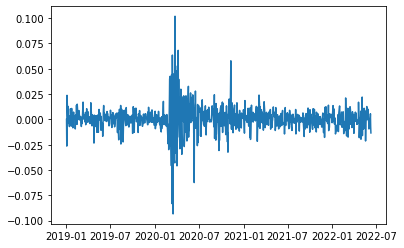

In [44]:
plt.plot(DRL_strat)

In [43]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (866, 8)
Annual return          0.105080
Cumulative returns     0.409687
Annual volatility      0.230359
Sharpe ratio           0.550285
Calmar ratio           0.283340
Stability              0.707645
Max drawdown          -0.370862
Omega ratio            1.123091
Sortino ratio          0.757917
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.927430
Daily value at risk   -0.028519
dtype: float64


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (867, 8)


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2019-01-02
End date,2022-06-09
Total months,41
,Backtest
Annual return,9.004%
Cumulative returns,34.529%
Annual volatility,22.79%
Sharpe ratio,0.49
Calmar ratio,0.28
Stability,0.76
Max drawdown,-32.329%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,32.33,2020-02-12,2020-03-23,2020-09-02,146
1,19.21,2022-01-11,2022-05-20,NaT,NaN
2,10.58,2020-09-02,2020-10-28,2020-11-09,49
3,7.18,2021-11-08,2021-12-01,2022-01-04,42
4,6.05,2019-07-29,2019-08-14,2019-09-12,34


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' i

Stress Events,mean,min,max
New Normal,0.04%,-10.86%,10.51%


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


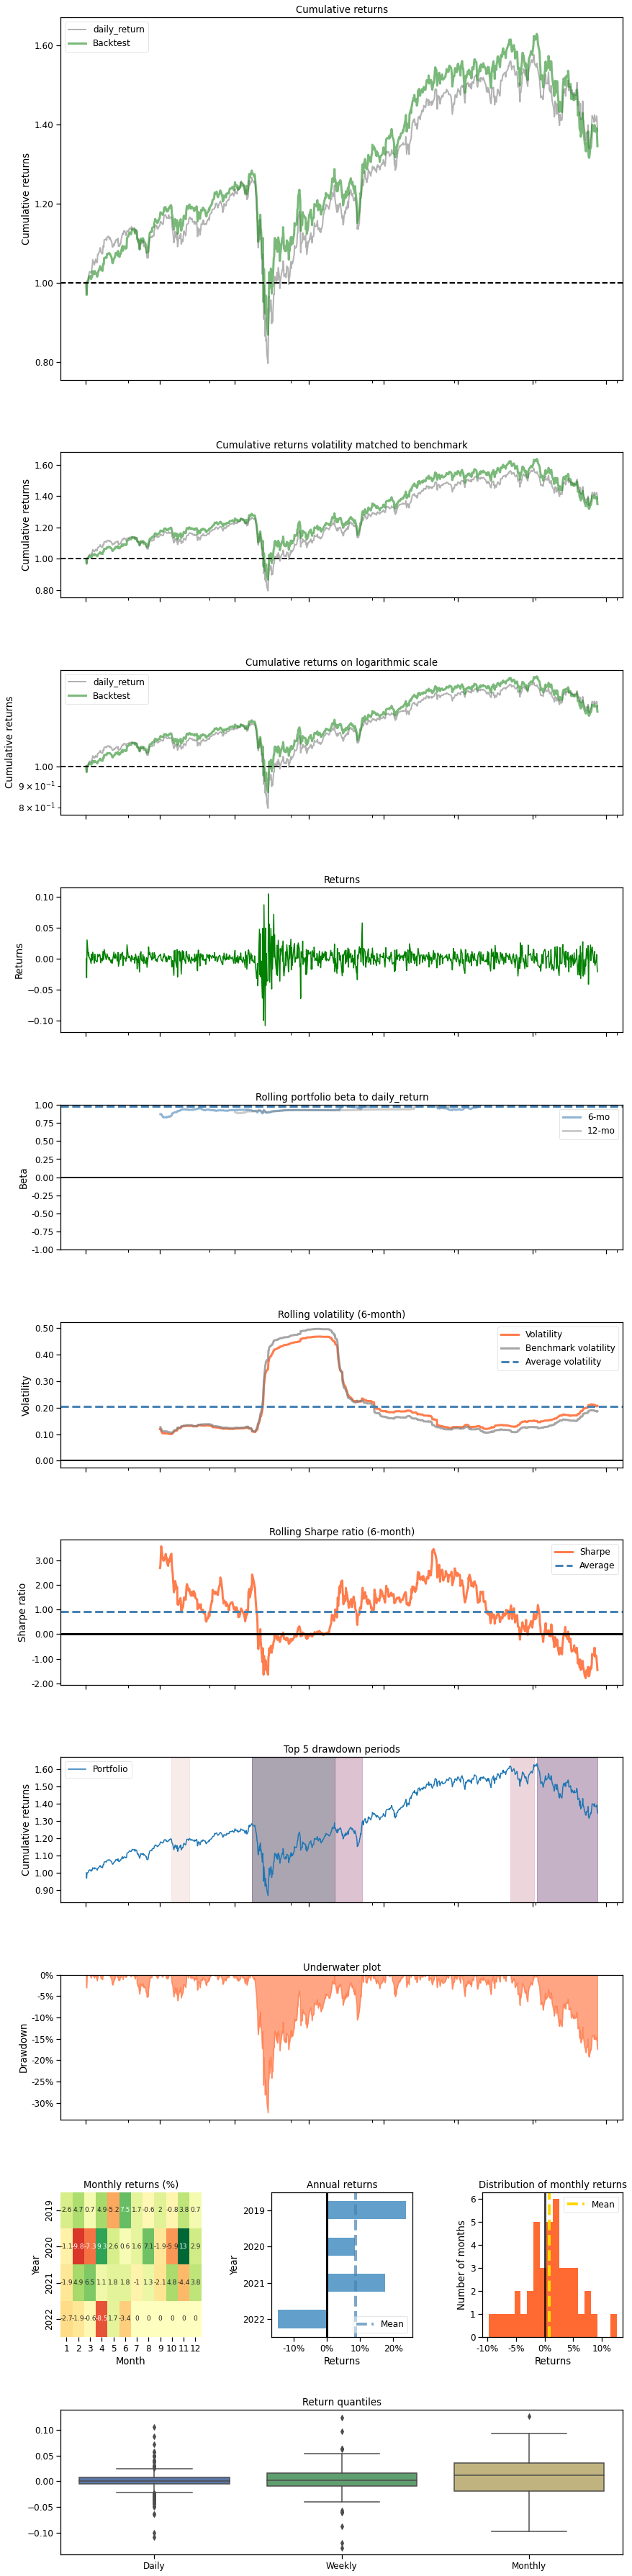

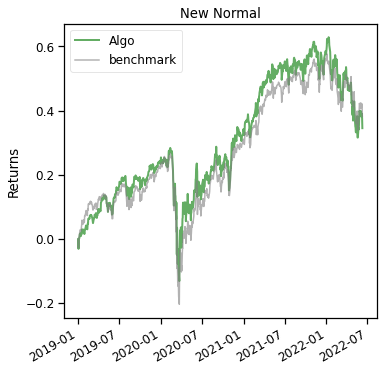

In [47]:
import pyfolio
%matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return.loc[0,'date'], end='2022-06-10'
    )

baseline_returns = get_daily_return(baseline_df, value_col_name="close")

with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat2,
                                       benchmark_rets=baseline_returns, set_context=False)

In [48]:
from scipy import stats
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 10000,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)
trained_ppo2 = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=400000)

{'n_steps': 10000, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device
0.8963625907857344


/Users/simone/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/ppo/ppo.py:140: UserWarning: You have specified a mini-batch size of 128, but because the `RolloutBuffer` is of size `n_steps * n_envs = 10000`, after every 78 untruncated mini-batches, there will be a truncated mini-batch of size 16
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=10000 and n_envs=1)
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.4779190631917477
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.9401334414566125
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.24186002770185355
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.5020330225486087
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.3978243452202854
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.048797781811838026
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.18339637614907833
begin_total_asset:1000000
end_total_asset:5368848.674025878
Sharpe:  0.6624421089466366
0.4738792496084854
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.6616328274055369
begin_total_asset:1000000
end_total_asset:1000000
Sharpe:  nan
0.6878435485735331
begin_total_asset:1000000
end_total_asset:4862167.827547269
Sharpe:  0.6658256204188753
0.909751208813639
begin_total_asset:1000000
end_total_asset:100

In [53]:
from scipy import stats
act_space = stock_dimension + 1
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "transaction_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.INDICATORS,
    "turbulence_threshold":0.9, 
    "action_space": act_space, 
    "reward_scaling": 1e-4,
    "training":False
    
}
trade = data_split(df,'2019-01-02', '2022-06-10')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)
df_daily_return3, df_actions3 = DRLAgent.DRL_prediction(model=trained_ppo2,
                        environment = e_trade_gym)

begin_total_asset:1000000
end_total_asset:1691007.5094304928
Sharpe:  0.8445941631140569
hit end!


In [54]:
from pyfolio import timeseries
DRL_strat3 = convert_daily_return_to_pyfolio_ts(df_daily_return3)
perf_func3 = timeseries.perf_stats 
perf_stats_all3 = perf_func( returns=DRL_strat3, 
                              factor_returns=DRL_strat3, 
                                positions=None, transactions=None, turnover_denom="AGB")

/Users/simone/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [55]:
perf_stats_all3

Annual return          0.164963
Cumulative returns     0.691008
Annual volatility      0.205879
Sharpe ratio           0.844594
Calmar ratio           0.638174
Stability              0.870657
Max drawdown          -0.258492
Omega ratio            1.179225
Sortino ratio          1.235092
Skew                   0.148292
Kurtosis               9.923710
Tail ratio             1.009672
Daily value at risk   -0.025248
Alpha                  0.000000
Beta                   1.000000
dtype: float64

In [61]:
df_actions3.mean()

AAPL    0.014121
AMGN    0.055030
AXP     0.056360
BA      0.032330
CAT     0.054105
CRM     0.000306
CSCO    0.048001
CVX     0.052106
DIS     0.062804
GS      0.019896
HD      0.000279
HON     0.107634
IBM     0.082025
INTC    0.000230
JNJ     0.017819
JPM     0.000259
KO      0.000040
MCD     0.024552
MMM     0.038630
MRK     0.023641
MSFT    0.015421
NKE     0.029163
PG      0.027102
TRV     0.000055
UNH     0.000040
VZ      0.093823
WBA     0.030345
WMT     0.045032
CASH    0.068851
dtype: float64